<a href="https://colab.research.google.com/github/Kanishkar-git/DEV_EXPERIMENTS/blob/main/DEV_exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2-2455631953.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=start_date, end=end_date, freq='M')


              Sales
count     48.000000
mean   29559.562500
std    11393.671539
min    10797.000000
25%    20761.500000
50%    29056.000000
75%    38202.500000
max    49512.000000


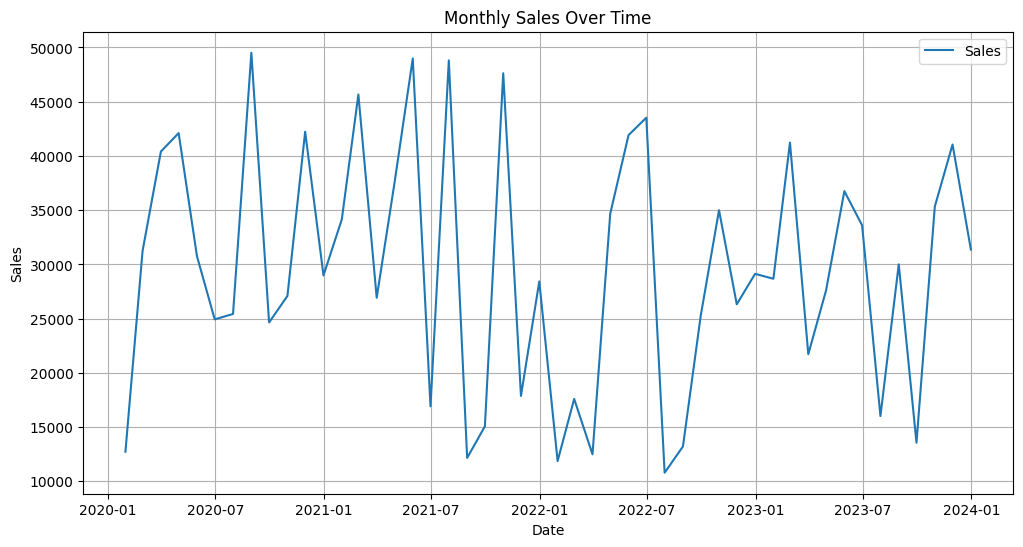

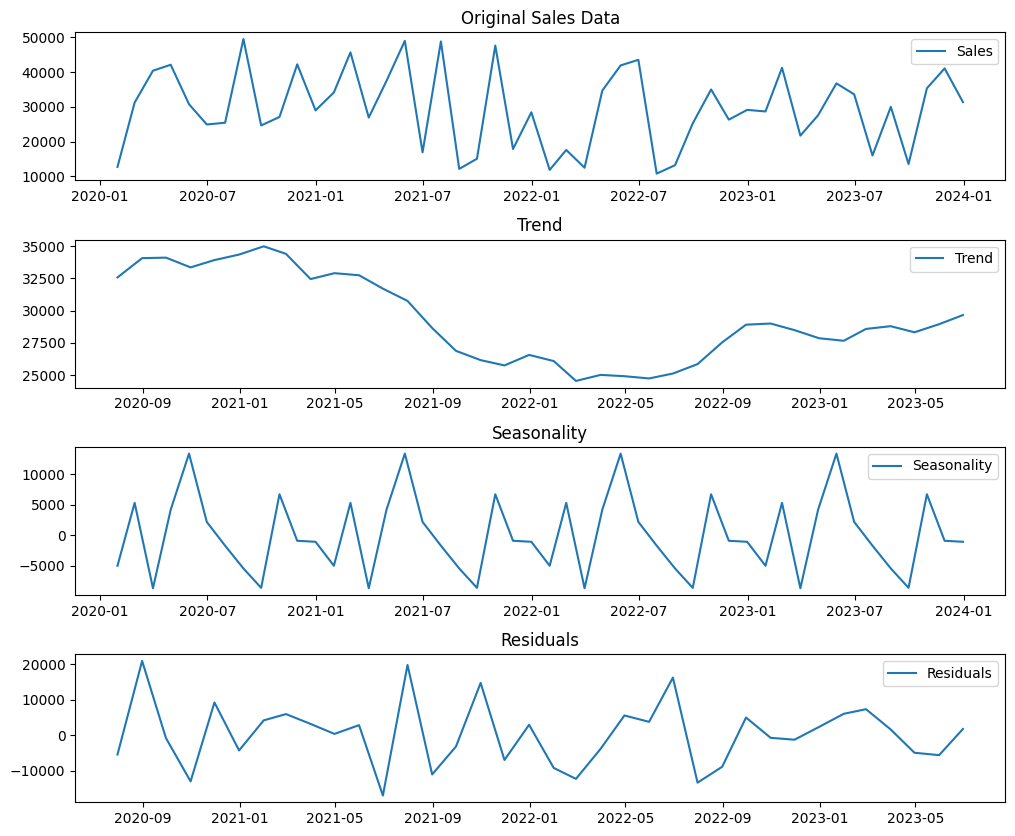

<Figure size 1200x400 with 0 Axes>

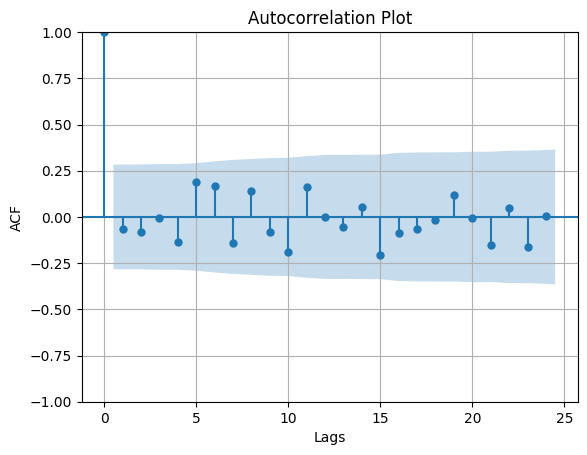

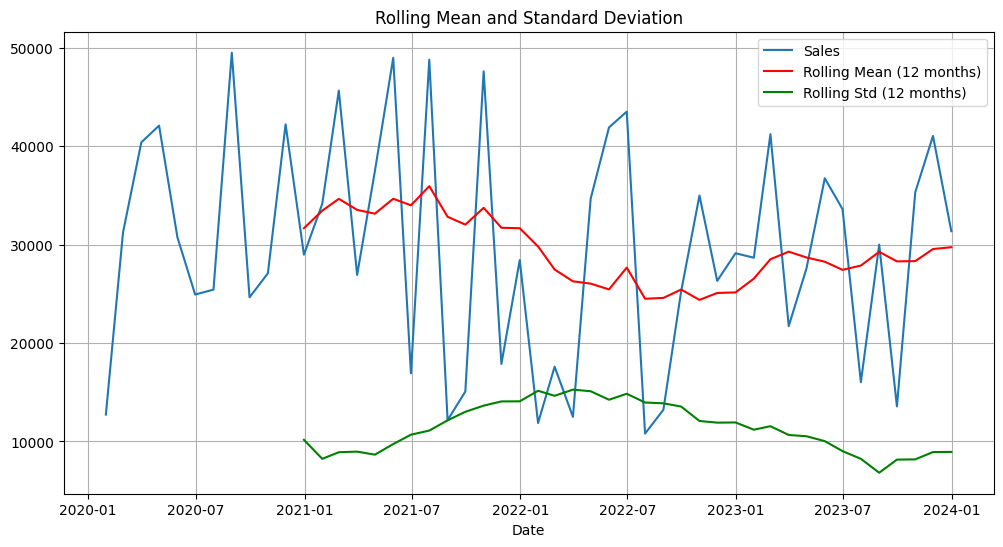

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

np.random.seed(0)

start_date = '2020-01-01'
end_date = '2023-12-31'
date_range = pd.date_range(start=start_date, end=end_date, freq='M')

sales_data = np.random.randint(10000, 50000, size=len(date_range))
df = pd.DataFrame({'Date': date_range, 'Sales': sales_data})
df.set_index('Date', inplace=True)

print(df.describe())

plt.figure(figsize=(12, 6))
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.plot(df.index, df['Sales'], label='Sales')
plt.legend()
plt.grid(True)
plt.show()

decomposition = seasonal_decompose(df['Sales'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.4)

plt.subplot(4, 1, 1)
plt.title('Original Sales Data')
plt.plot(df.index, df['Sales'], label='Sales')
plt.legend()

plt.subplot(4, 1, 2)
plt.title('Trend')
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.title('Seasonality')
plt.plot(seasonal, label='Seasonality')
plt.legend()

plt.subplot(4, 1, 4)
plt.title('Residuals')
plt.plot(residual, label='Residuals')
plt.legend()

plt.show()

plt.figure(figsize=(12, 4))
plot_acf(df['Sales'], lags=24)
plt.title('Autocorrelation Plot')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.grid(True)
plt.show()

rolling_mean = df['Sales'].rolling(window=12).mean()
rolling_std = df['Sales'].rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.plot(df.index, df['Sales'], label='Sales')
plt.plot(rolling_mean, label='Rolling Mean (12 months)', color='red')
plt.plot(rolling_std, label='Rolling Std (12 months)', color='green')
plt.legend()
plt.grid(True)
plt.show()
